In [1]:
from sklearn.datasets import make_classification

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X, y = make_classification(
    n_samples=300,      # total points
    n_features=2,       # 2D dataset (for easy plotting)
    n_redundant=0,      # no redundant features
    n_informative=2,    # both features are useful
    n_clusters_per_class=1,
    class_sep=2.0,      # how far apart the classes are
    random_state=42
)


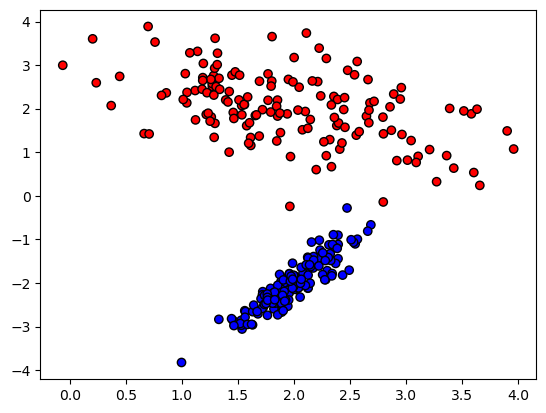

In [7]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.bwr,edgecolor='k')
plt.show()

In [8]:
X.shape

(300, 2)

In [26]:
w = np.zeros((X.shape[1]))

In [27]:
w

array([0., 0.])

In [30]:
w.T@X[1]

0.0

In [31]:
for i in range(X.shape[0]):
    y_p = w.T@X[i]
    if y_p != y[i]:
        w = w+ X[i]*y[i]

In [32]:
w

array([291.8393154 , 303.81178973])

In [35]:
def predict(x,w):
    y_pred = x@w.T
    return (y_pred>=0).astype(int)
    

In [37]:
y_preds = predict(X,w)

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73       150
           1       0.70      1.00      0.83       150

    accuracy                           0.79       300
   macro avg       0.85      0.79      0.78       300
weighted avg       0.85      0.79      0.78       300



In [41]:
def zero_one_loss(y,yp):
    return np.sum(y != yp)

In [42]:
zero_one_loss(y,y_preds)

63

In [48]:
def perceptron(x,y,lr=1):
    y = np.where(y<=0,-1,1)
    w = np.zeros(x.shape[1])
    b =0
    for i in range(X.shape[0]):
        y_p = w.T@X[i]+b
        if y_p != y[i]:
            w = w+ lr*(X[i]*y[i])
            b += lr*(y[i])
    return w 

In [49]:
w1 = perceptron(X,y)

In [50]:
yp2 = predict(X,w1)

In [51]:
zero_one_loss(y,yp2)

2

In [52]:
print(classification_report(y,yp2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       150
           1       1.00      0.99      0.99       150

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [75]:
def decision_boundary(x,y,w):
    mn1,mx1 = x[:,0].min()-1,x[:,0].max()+1
    mn2,mx2 = x[:,1].min()-1,x[:,1].max()+1
    xx,yy = np.meshgrid(np.arange(mn1,mx1,0.5),np.arange(mn2,mx2,0.5))
    grid = np.c_[xx.ravel(),yy.ravel()]
    Z = predict(grid,w)
    z = Z.reshape(xx.shape)
    plt.contourf(xx,yy,z,alpha=0.3,cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.bwr)
    plt.show()

In [65]:
mn1,mx1 = X[:,0].min()-1,X[:,0].max()+1
mn2,mx2 = X[:,1].min()-1,X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(mn1,mx1,0.5),np.arange(mn2,mx2,0.5))
grid = np.c_[xx.ravel(),yy.ravel()]

In [69]:
grid.shape

(260, 2)

In [70]:
z = predict(grid,w1)

In [73]:
j = z.reshape(xx.shape)

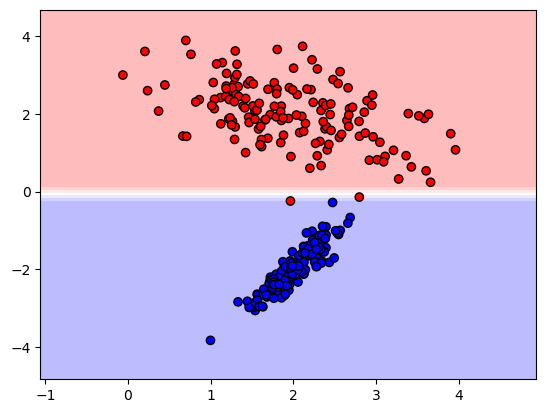

In [74]:
plt.contourf(xx,yy,j,alpha=0.3,cmap=plt.cm.bwr)
plt.scatter(X[:,0],X[:,1],c=y,edgecolors='k',cmap=plt.cm.bwr)
plt.show()

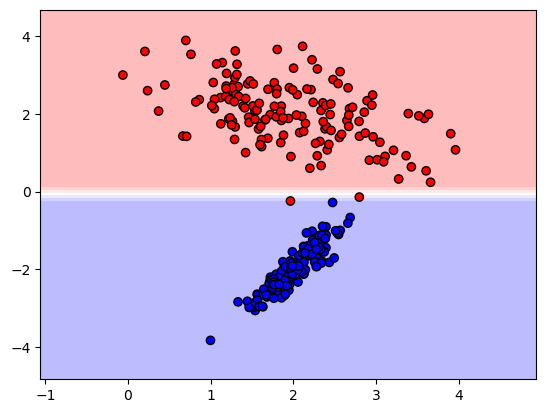

In [76]:
decision_boundary(X,y,w1)